##  Step 1) Prepare Data

## import librairries

In [170]:
#import librairries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

## import Dataset

In [171]:
Col_name = ['Id number', 'Ri','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [172]:
data = pd.read_csv("glass.csv", names= Col_name)

In [173]:
data.head()

,Id number,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [174]:
data.tail()

,Id number,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [175]:
data.dtypes

Id number      int64
Ri           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
Type           int64
dtype: object

In [176]:
data.shape

(214, 11)

##  Step 2) Summarize Data

In [177]:
data.describe()

,Id number,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


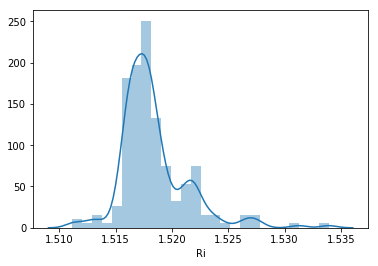

In [178]:
sns.distplot(data.Ri)

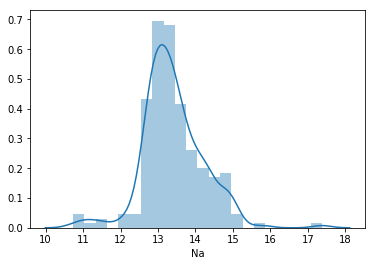

In [179]:
sns.distplot(data.Na)

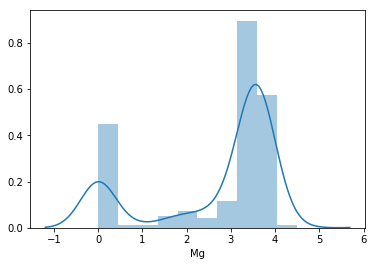

In [180]:
sns.distplot(data.Mg)

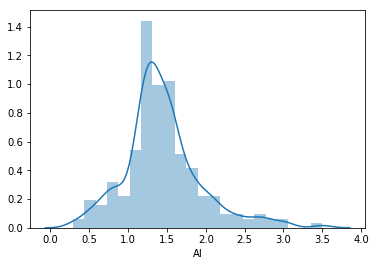

In [181]:
sns.distplot(data.Al)

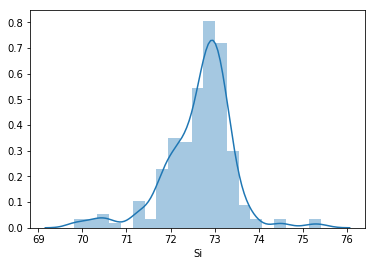

In [182]:
sns.distplot(data.Si)

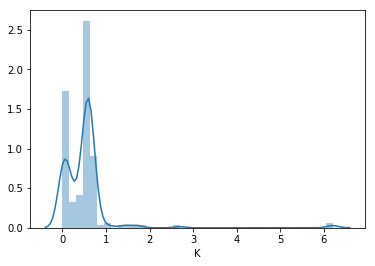

In [183]:
sns.distplot(data.K)

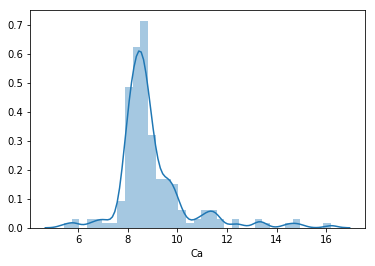

In [184]:
sns.distplot(data.Ca)

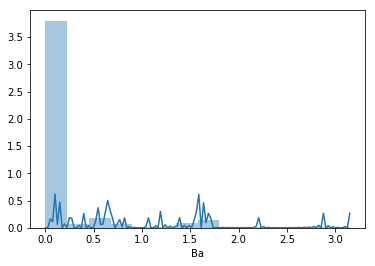

In [185]:
sns.distplot(data.Ba)

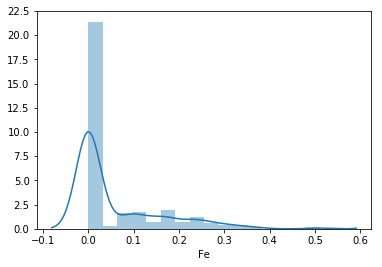

In [186]:
sns.distplot(data.Fe)

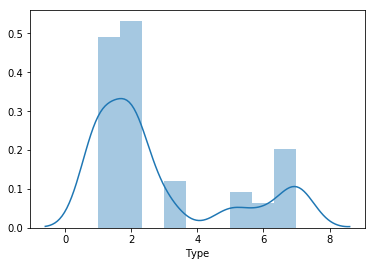

In [187]:
sns.distplot(data.Type)

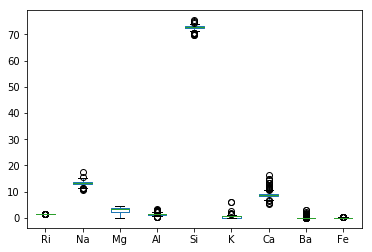

In [190]:
inde_vari = data[Col_name[1:-1]]
plt.figure(figsize=(8,6))
inde_vari.plot.box()

In [301]:
dep_vari = data.iloc[:,-1]

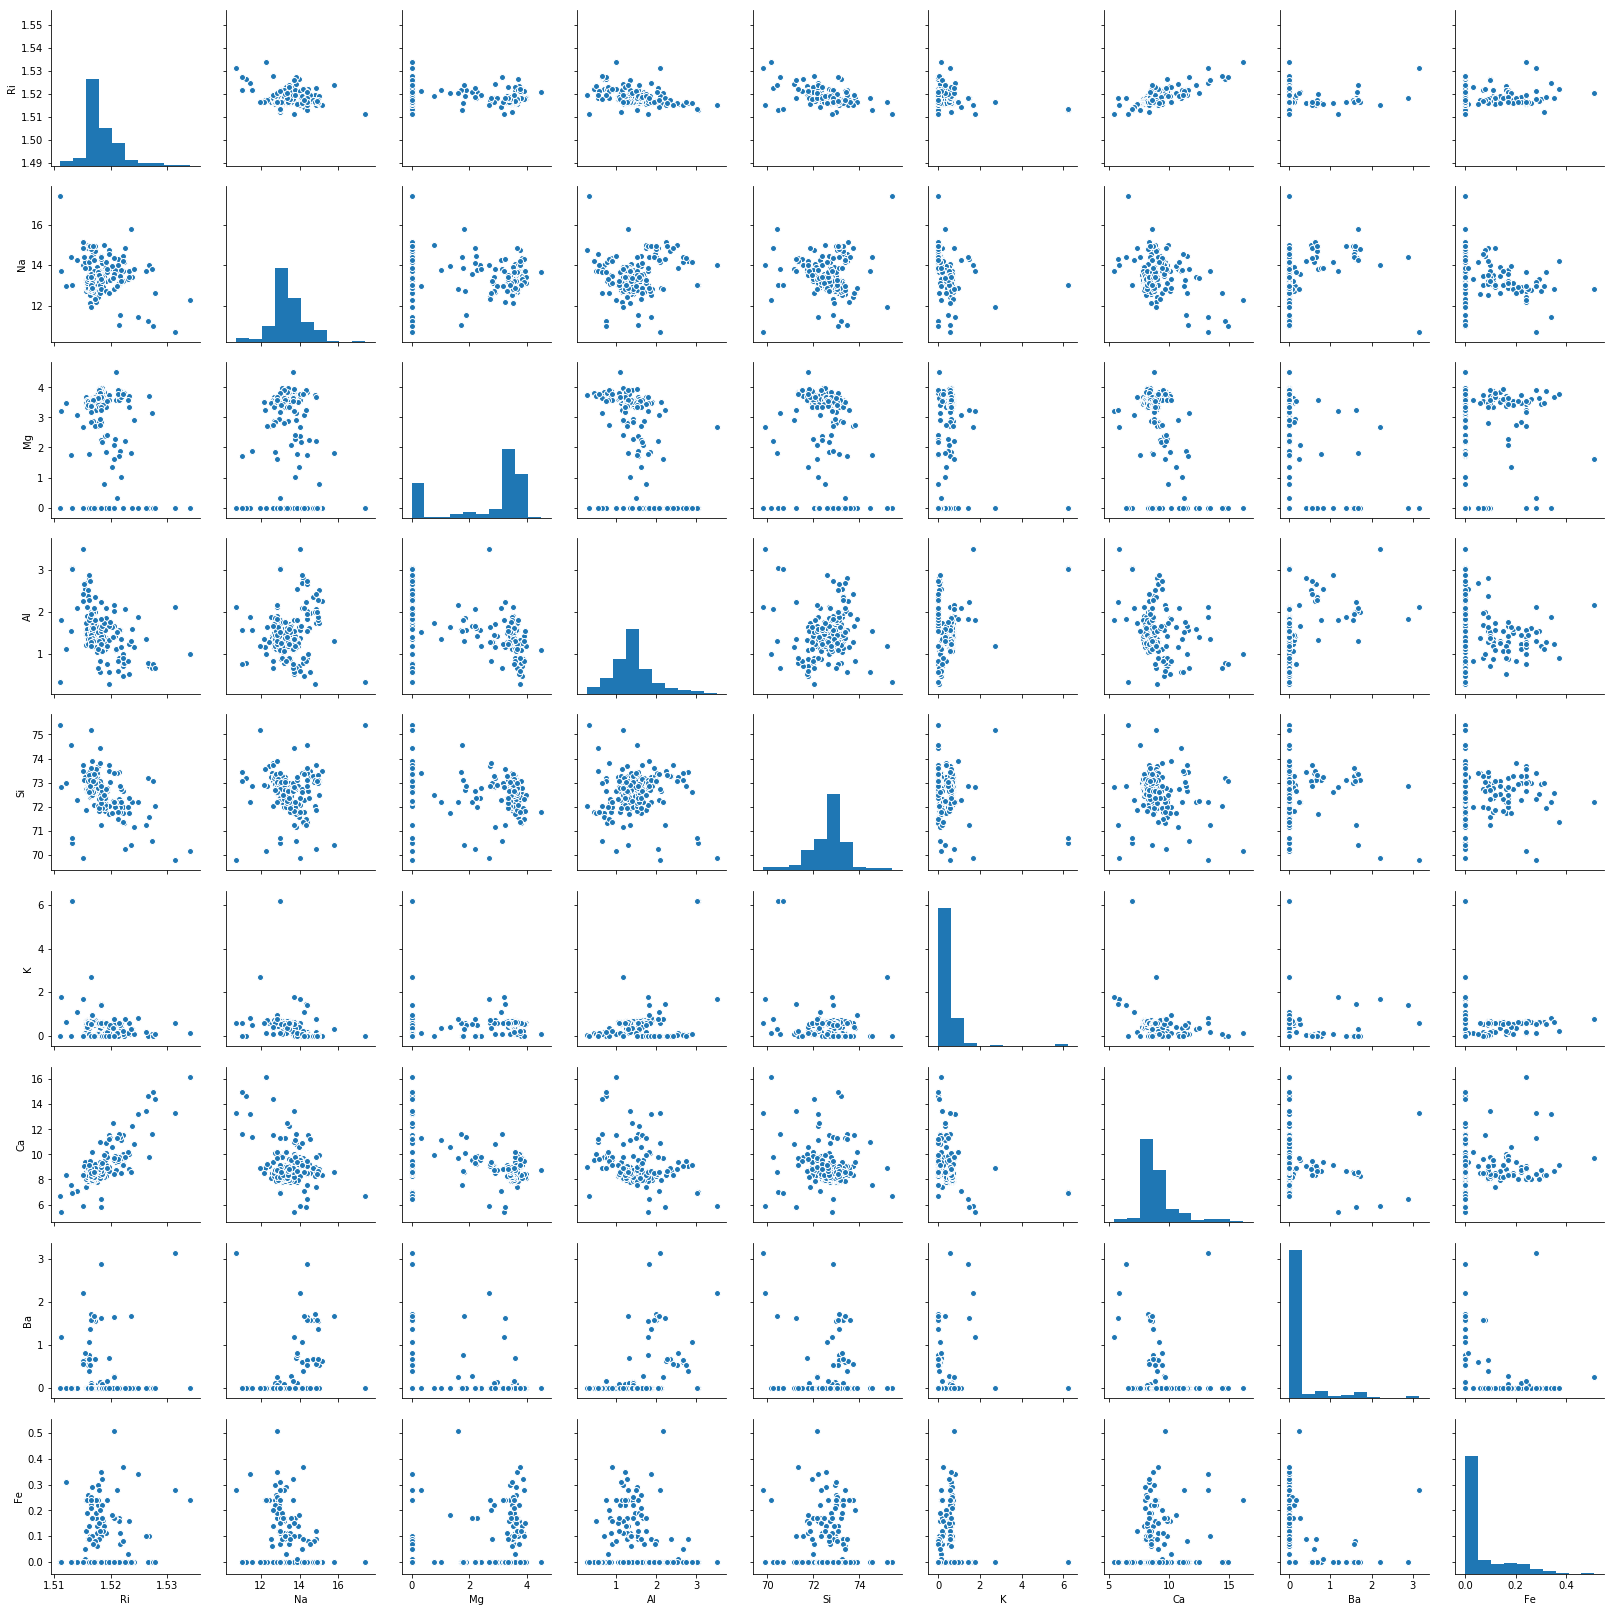

In [191]:
sns.pairplot(inde_vari)

In [192]:
#Calculate correlation and plot
corre = inde_vari.corr()
corre

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


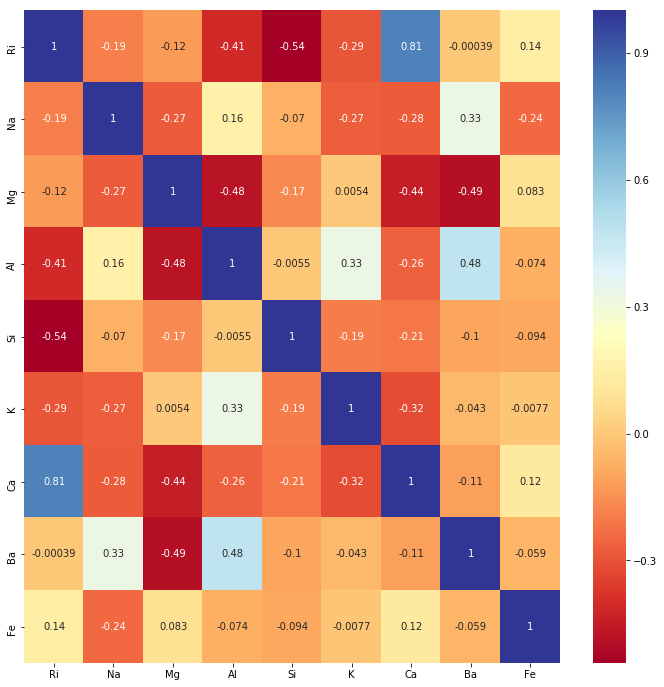

In [193]:
plt.figure(figsize=(12,12))
sns.heatmap(corre,annot=True, cmap= 'RdYlBu')

## Step 3) Prepare Data

In [194]:
Class = data.Type.value_counts()
Class

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Text(0,0.5,'Quantity')

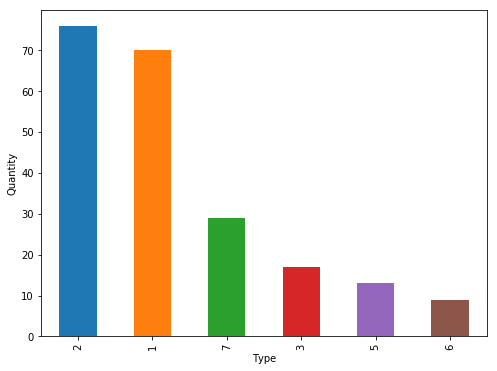

In [195]:
Class.plot(kind='bar', figsize=(8,6))
plt.xlabel('Type')
plt.ylabel('Quantity')

In [196]:
## check missing values and NaN
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id number    214 non-null int64
Ri           214 non-null float64
Na           214 non-null float64
Mg           214 non-null float64
Al           214 non-null float64
Si           214 non-null float64
K            214 non-null float64
Ca           214 non-null float64
Ba           214 non-null float64
Fe           214 non-null float64
Type         214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [307]:
x = inde_vari.values
y = dep_vari.values

In [308]:
x.shape

(214, 9)

In [309]:
y.shape

(214,)

In [310]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [311]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

## spliting the dataset into training set and test set

In [312]:
from sklearn.cross_validation import train_test_split 

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [314]:
x_train , x_test

(array([[ 1.51674, 12.79   ,  3.52   , ...,  7.9    ,  0.     ,  0.     ],
        [ 1.51808, 13.43   ,  2.87   , ...,  9.03   ,  0.     ,  0.     ],
        [ 1.52152, 13.05   ,  3.65   , ...,  9.85   ,  0.     ,  0.17   ],
        ...,
        [ 1.51708, 13.72   ,  3.68   , ...,  7.88   ,  0.     ,  0.     ],
        [ 1.52667, 13.99   ,  3.7    , ...,  9.82   ,  0.     ,  0.1    ],
        [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]]),
 array([[1.51727e+00, 1.47000e+01, 0.00000e+00, 2.34000e+00, 7.32800e+01,
         0.00000e+00, 8.95000e+00, 6.60000e-01, 0.00000e+00],
        [1.51797e+00, 1.27400e+01, 3.48000e+00, 1.35000e+00, 7.29600e+01,
         6.40000e-01, 8.68000e+00, 0.00000e+00, 0.00000e+00],
        [1.51640e+00, 1.25500e+01, 3.48000e+00, 1.87000e+00, 7.32300e+01,
         6.30000e-01, 8.08000e+00, 0.00000e+00, 9.00000e-02],
        [1.51905e+00, 1.40000e+01, 2.39000e+00, 1.56000e+00, 7.23700e+01,
         0.00000e+00, 9.57000e+00, 0.00000e+00, 0.000

In [315]:
y_train, y_test

(array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2,
        1, 7, 1, 2, 6, 3, 2, 7, 3, 2, 2, 1, 1, 2, 7, 1, 1, 3, 7, 7, 2, 1,
        1, 1, 2, 7, 1, 1, 2, 2, 7, 7, 7, 3, 2, 1, 2, 2, 5, 7, 1, 2, 1, 2,
        2, 2, 1, 3, 1, 1, 1, 1, 2, 7, 1, 2, 2, 2, 5, 7, 1, 1, 2, 2, 7, 5,
        6, 6, 5, 2, 6, 1, 2, 2, 1, 1, 1, 1, 2, 5, 1, 2, 2, 7, 1, 1, 2, 1,
        7, 2, 1, 1, 2, 5, 3, 1, 6, 2, 7, 1, 5, 2, 6, 3, 1, 6, 2, 2, 5, 2,
        2, 3, 7, 2, 2, 1, 5, 2, 7, 5, 7, 1, 7, 1, 2, 2, 2, 2, 1, 1, 1, 2,
        7, 1, 7, 2, 1, 5]),
 array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
        7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2, 1,
        2, 2, 1, 2, 1, 2, 1, 2, 7, 1]))

## Feature Scalling

In [316]:
from sklearn.preprocessing import StandardScaler

In [317]:
sc_x = StandardScaler()

In [318]:
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [319]:
x_train

array([[-0.57016436, -0.8021311 ,  0.59394972, ..., -0.73204433,
        -0.36042422, -0.5574741 ],
       [-0.12738242, -0.01596892,  0.14178098, ...,  0.03745343,
        -0.36042422, -0.5574741 ],
       [ 1.00931153, -0.48275272,  0.68438347, ...,  0.59585004,
        -0.36042422,  1.35466909],
       ...,
       [-0.4578167 ,  0.34026082,  0.70525279, ..., -0.74566376,
        -0.36042422, -0.5574741 ],
       [ 2.7110481 ,  0.67192299,  0.71916568, ...,  0.57542089,
        -0.36042422,  0.56731601],
       [-1.73659739, -0.54417164, -1.85471789, ..., -1.39258666,
        -0.36042422, -0.5574741 ]])

In [320]:
x_test

array([[-3.95034190e-01,  1.54407167e+00, -1.85471789e+00,
         1.75197496e+00,  8.54487173e-01, -6.88607851e-01,
        -1.70242868e-02,  1.01064199e+00, -5.57474100e-01],
       [-1.63730189e-01, -8.63550025e-01,  5.66123950e-01,
        -1.61246920e-01,  4.37862630e-01,  1.79249921e-01,
        -2.00886585e-01, -3.60424223e-01, -5.57474100e-01],
       [-6.82512019e-01, -1.09694192e+00,  5.66123950e-01,
         8.43677703e-01,  7.89389588e-01,  1.65689643e-01,
        -6.09469468e-01, -3.60424223e-01,  4.54837002e-01],
       [ 1.93138841e-01,  6.84206777e-01, -1.92128234e-01,
         2.44588024e-01, -3.30288871e-01, -6.88607851e-01,
         4.05178026e-01, -3.60424223e-01, -5.57474100e-01],
       [ 1.72635393e+00, -3.68513524e-03, -1.85471789e+00,
         2.83238971e-01, -5.25581625e-01, -2.54678965e-01,
         2.22337186e+00, -3.60424223e-01, -5.57474100e-01],
       [-8.47729162e-01, -5.19604069e-01,  6.35688371e-01,
         1.47960657e-01,  6.46174901e-01,  2.470513

In [321]:
Col_name1 = ['Ri','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [322]:
scalled_data = pd.DataFrame(x_train, columns=Col_name1)

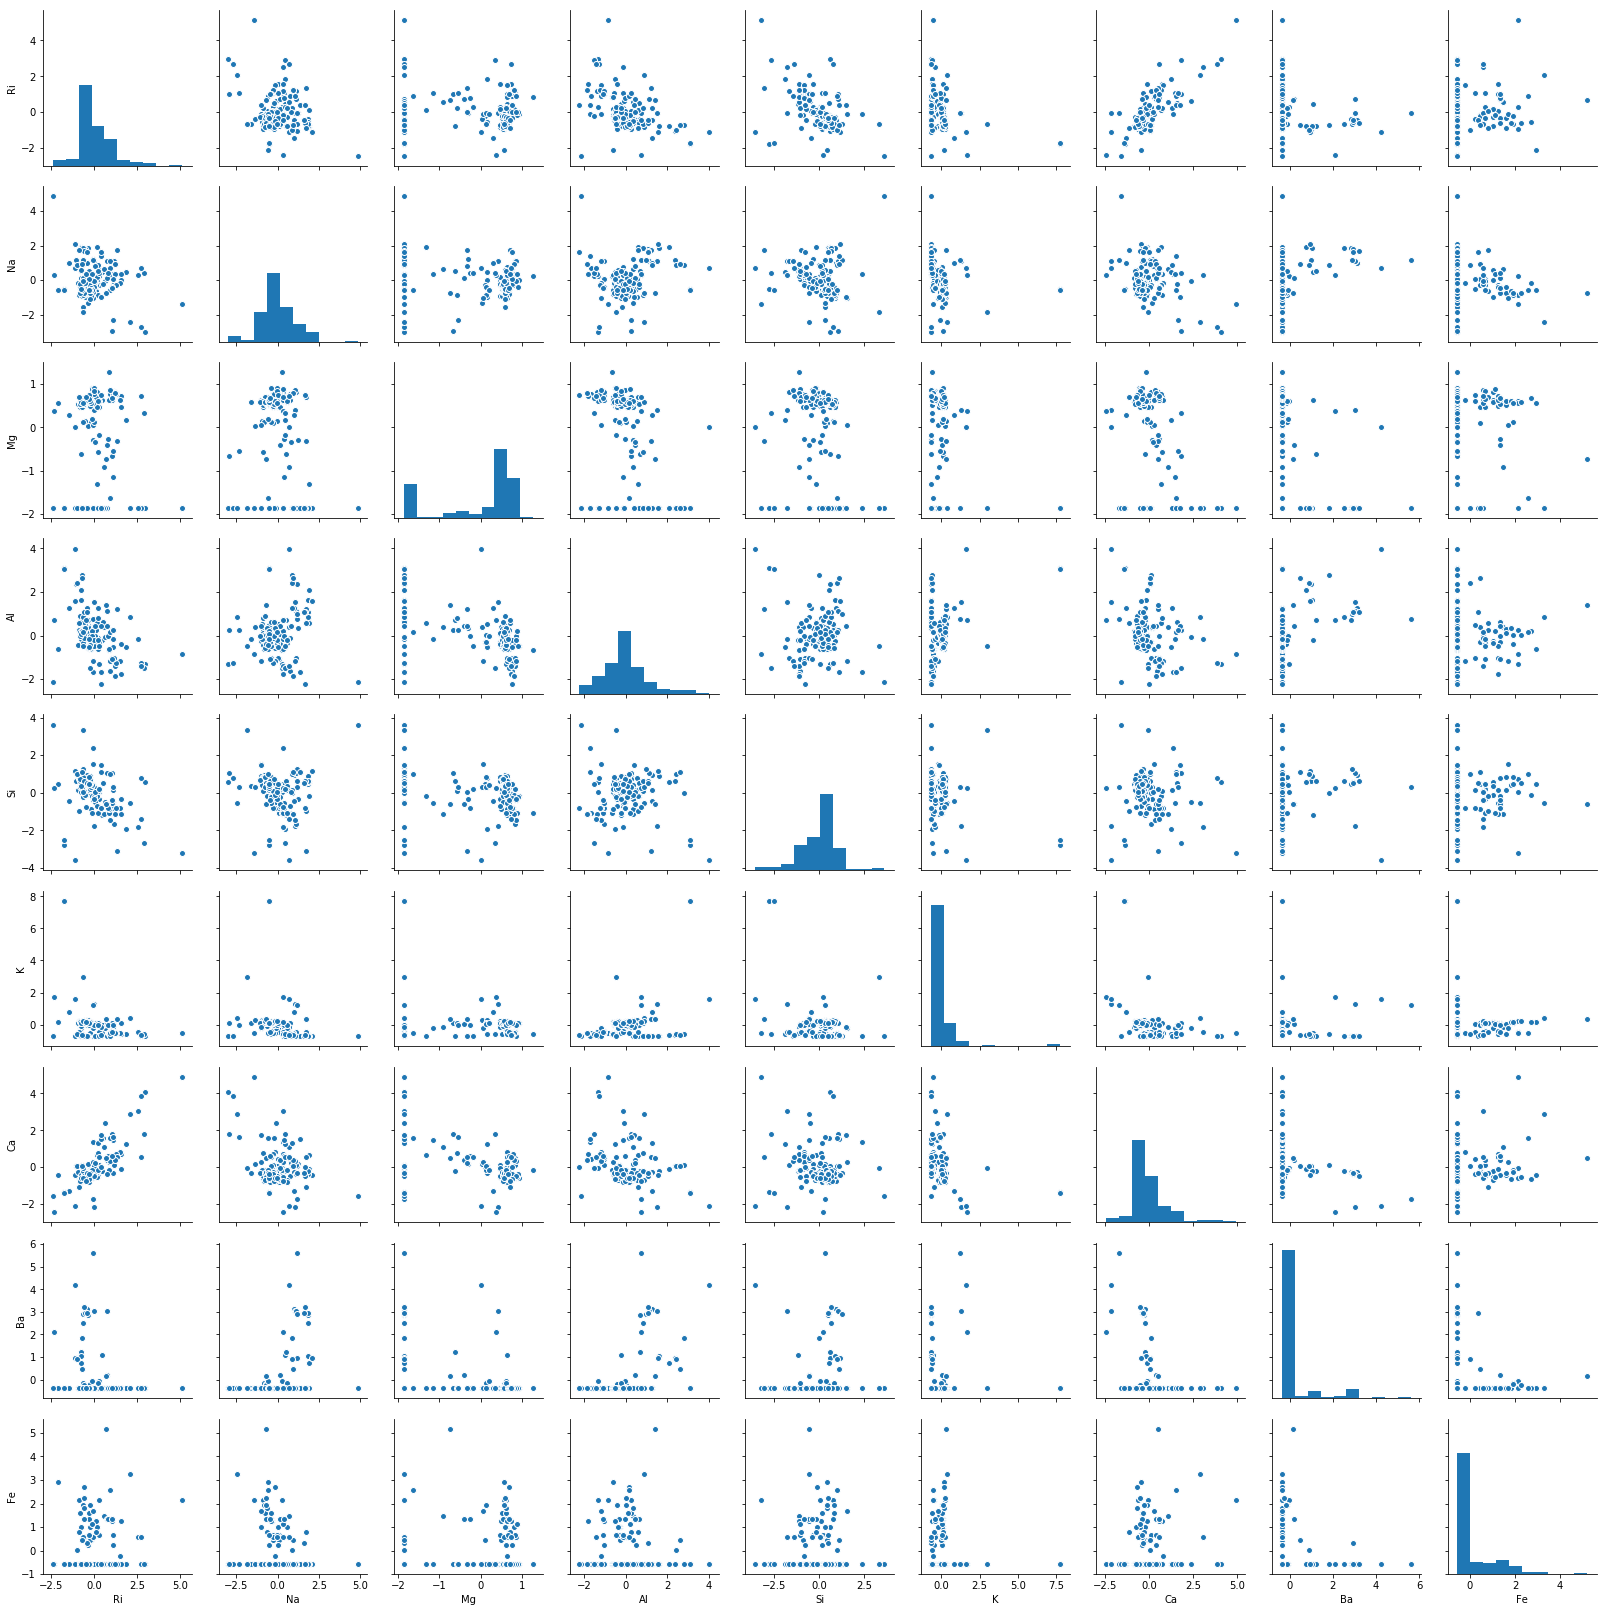

In [214]:
sns.pairplot(scalled_data)

# Step 4: Evaluate Algorithms

# Model Selection base on output

In [620]:
seed = 7
result = []
names = []
proce_time = []

## 1- Logistic Regression

In [621]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=seed)

In [622]:
start = time()
scores = cross_val_score(LR, x_train, y_train, scoring='accuracy' ,cv=7).mean()
end = time()

print("Performed in %f seconds" %(end-start))

result.append((scores*100))
names.append('LR')
proce_time.append(end-start)

print("The mean accuracy with 7 fold cross validation is %s" % round(scores*100,2))

Performed in 0.028437 seconds
The mean accuracy with 7 fold cross validation is 62.12


# 2- K-NN

In [607]:
from sklearn.neighbors import KNeighborsClassifier

In [530]:
knn = KNeighborsClassifier()

In [623]:
start = time()
scores = cross_val_score(knn, x_train, y_train, scoring='accuracy' ,cv=seed).mean()
end = time()

print("Performed in %f seconds" %(end-start))

result.append((scores*100))
names.append('K-NN')
proce_time.append(end-start)

print("The mean accuracy with 7 fold cross validation is %s" % round(scores*100,2))

Performed in 0.022082 seconds
The mean accuracy with 7 fold cross validation is 64.62


# 3- Decesion Tree

In [532]:
from sklearn.tree import DecisionTreeClassifier

In [533]:
DT = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [625]:
start = time()
scores = cross_val_score(DT, x_train, y_train, scoring='accuracy' ,cv=seed).mean()
end = time()

print("performed in %f seconds" %(end-start))

result.append((scores*100))
names.append('DT')
proce_time.append(end-start)

print("The mean accuracy with 7 fold cross validation is %s" % round(scores*100,2))

performed in 0.022409 seconds
The mean accuracy with 7 fold cross validation is 70.21


# 4- Random Forest

In [535]:
from sklearn.ensemble import RandomForestClassifier

In [536]:
RF = RandomForestClassifier(n_estimators= 15, criterion='gini', random_state=seed)

In [626]:
start = time()
scores = cross_val_score(RF, x_train, y_train, scoring='accuracy' ,cv=seed).mean()
end  = time()

print("performed in %f seconds" %(end-start))

result.append((scores*100))
names.append('RF')
proce_time.append(end-start)

print("The mean accuracy with 7 fold cross validation is %s" % round(scores*100,2))

performed in 0.178793 seconds
The mean accuracy with 7 fold cross validation is 77.16


In [629]:
proce_time

[0.028437376022338867,
 0.02208232879638672,
 0.02240920066833496,
 0.17879271507263184,
 0.025738954544067383]

# 5- SVM

In [538]:
from sklearn.svm import SVC

In [539]:
svc = SVC(random_state=seed, kernel='rbf')

In [628]:
start = time()
scores = cross_val_score(svc, x_train, y_train, scoring='accuracy' ,cv=seed).mean()
end = time()

print("performed in %f seconds" %(end-start))

result.append((scores*100))
names.append('SVM')
proce_time.append(end-start)

print("The mean accuracy with 7 fold cross validation is %s" % round(scores*100,2))

performed in 0.025739 seconds
The mean accuracy with 7 fold cross validation is 71.41


In [630]:
result

[62.11961227178618,
 64.61639912882148,
 70.21351939985479,
 77.16249899169154,
 71.40903713263961]

In [631]:
names

['LR', 'K-NN', 'DT', 'RF', 'SVM']

In [632]:
proce_time

[0.028437376022338867,
 0.02208232879638672,
 0.02240920066833496,
 0.17879271507263184,
 0.025738954544067383]

In [633]:
Comparision = pd.DataFrame(names,columns=['Classifier'])

In [634]:
Comparision['Accuracy'] = result
Comparision['Process_time'] = proce_time

In [635]:
Comparision.sort_values(by='Accuracy')

,Classifier,Accuracy,Process_time
0,LR,62.119612,0.028437
1,K-NN,64.616399,0.022082
2,DT,70.213519,0.022409
4,SVM,71.409037,0.025739
3,RF,77.162499,0.178793


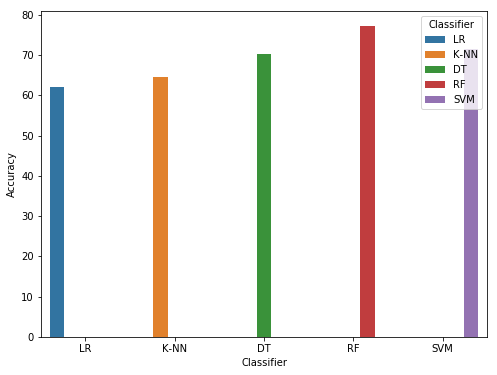

In [642]:
plt.figure(figsize=(8,6))

sns.barplot(x=Comparision.Classifier, y= Comparision.Accuracy, data=Comparision,hue=Comparision.Classifier)


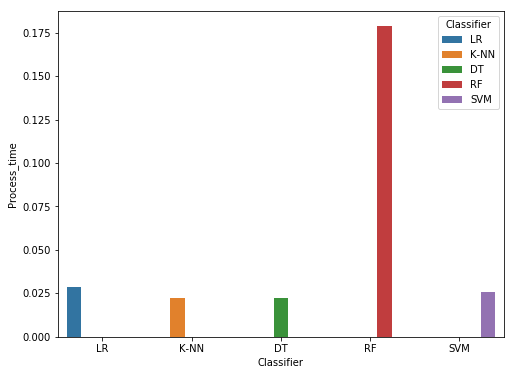

In [644]:
plt.figure(figsize=(8,6))

sns.barplot(x=Comparision.Classifier, y= Comparision.Process_time, data=Comparision,hue=Comparision.Classifier)


### Observation: The best performances are achieved by RF. It is worthy to continue our study by tuning RF

# Step 5) Improve Accuracy

### Tuning Random Forest Classifier

#### : Areas to tune , n_estimators,  criterion,  random_state

In [586]:
from time import time

In [596]:
from sklearn.ensemble import RandomForestClassifier

fine_RF = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)

In [645]:
start = time()
scores = cross_val_score(fine_RF, x_train, y_train, scoring='accuracy' ,cv=seed)
end = time()

print("performed in %f seconds" %(end-start))

#print("Accuracy: %f  % (100 * scores.mean())
# Best score and best parameters
print('-------Accuracy----------')
print(scores.mean() * 100.0)


#print("The mean accuracy with 7 fold cross validation is %s" % (scores*100,2))

performed in 0.176939 seconds
-------Accuracy----------
79.64221182544163


## Step 6) Diagnose overfitting by plotting the learning and validation curves

### Learning Curve

In [671]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [672]:
#from sklearn.ensemble import RandomForestClassifier

#fine_RF = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)

In [673]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

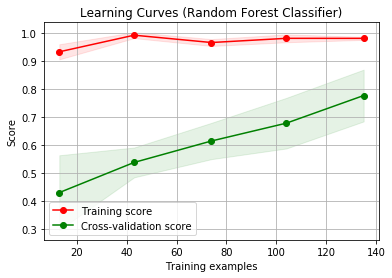

In [674]:
#X = inde_vari.values
#y = dep_vari.values
X = x_train
y = y_train
title = "Learning Curves (Random Forest Classifier)"
cv = 7
estimator = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)

plot_learning_curve(estimator, title, X, y, cv=cv)

plt.show()


## Validation Curve

In [670]:
from sklearn.model_selection import validation_curve

In [683]:
rfestimator = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)
n_estimators= 10

In [687]:
train_scores, test_scores = validation_curve(RandomForestClassifier(criterion='entropy', random_state=0), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/basharat/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/basharat/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fb0c07655d0, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/basharat/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/bashar.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fb0c07655d0, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/basharat/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/bashar.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method PollIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 1, 18, 7, 49, 447632, tzinfo=tzutc()), 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'session': '27a1e2c1e1504321a5ec9b3d4207a47a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'27a1e2c1e1504321a5ec9b3d4207a47a']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 1, 18, 7, 49, 447632, tzinfo=tzutc()), 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'session': '27a1e2c1e1504321a5ec9b3d4207a47a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'27a1e2c1e1504321a5ec9b3d4207a47a'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 1, 18, 7, 49, 447632, tzinfo=tzutc()), 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'session': '27a1e2c1e1504321a5ec9b3d4207a47a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f6643f7cf9d0464699a2979535d33f28', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='train_scores, test_scores = validation_curve(Ran....tight_layout()\nplt.legend(loc="best")\nplt.show()', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-687-c047f5df1252>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fb04b57a630, executi..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fb04da7e930, file "<ipython-input-687-c047f5df1252>", line 1>
        result = <ExecutionResult object at 7fb04b57a630, executi..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fb04da7e930, file "<ipython-input-687-c047f5df1252>", line 1>, result=<ExecutionResult object at 7fb04b57a630, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fb04da7e930, file "<ipython-input-687-c047f5df1252>", line 1>
        self.user_global_ns = {'Accuracy_Score': 62.12, 'Class': 2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64, 'Col_name': ['Id number', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], 'Col_name1': ['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], 'Comparision':   Classifier   Accuracy  Process_time
0         ...   0.178793
4        SVM  71.409037      0.025739, 'DT': DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best'), 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'data.iloc[:,10].values', '#import librairries\nimport numpy as np\nimport pa...rt matplotlib.pyplot as plt\nimport seaborn as sns', "Col_name = ['Id number', 'Ri','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']", 'data = pd.read_csv("glass.csv", names= Col_name)', 'data.head()', 'data.tail()', 'data.dtypes', 'data.shape', 'data.describe()', 'sns.distplot(data.Ri)', 'data.iloc[:,10].values', "dep_vari['Class'] = pd.DataFram(data.iloc[:,10].values)", "dep_vari['Class'] = pd.DataFrame(data.iloc[:,10].values)", 'dep_vari = pd.DataFrame(data.iloc[:,10].values)', 'dep_vari = pd.DataFrame(data.iloc[:,10].values)\ndep_vari.count', 'dep_vari = pd.DataFrame(data.iloc[:,10].values)\ndep_vari.values', "data['Type'].count()", "data['Type'].count()", 'data.Type.value_counts()', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
        self.user_ns = {'Accuracy_Score': 62.12, 'Class': 2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64, 'Col_name': ['Id number', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], 'Col_name1': ['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], 'Comparision':   Classifier   Accuracy  Process_time
0         ...   0.178793
4        SVM  71.409037      0.025739, 'DT': DecisionTreeClassifier(class_weight=None, criter...lse, random_state=0,
            splitter='best'), 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'data.iloc[:,10].values', '#import librairries\nimport numpy as np\nimport pa...rt matplotlib.pyplot as plt\nimport seaborn as sns', "Col_name = ['Id number', 'Ri','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']", 'data = pd.read_csv("glass.csv", names= Col_name)', 'data.head()', 'data.tail()', 'data.dtypes', 'data.shape', 'data.describe()', 'sns.distplot(data.Ri)', 'data.iloc[:,10].values', "dep_vari['Class'] = pd.DataFram(data.iloc[:,10].values)", "dep_vari['Class'] = pd.DataFrame(data.iloc[:,10].values)", 'dep_vari = pd.DataFrame(data.iloc[:,10].values)', 'dep_vari = pd.DataFrame(data.iloc[:,10].values)\ndep_vari.count', 'dep_vari = pd.DataFrame(data.iloc[:,10].values)\ndep_vari.values', "data['Type'].count()", "data['Type'].count()", 'data.Type.value_counts()', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/media/basharat/Data/Data Science/ML and Deep Learning/Assignment 2 Glass Dataset/<ipython-input-687-c047f5df1252> in <module>()
      3                                              y, 
      4                                              param_name="n_estimators", 
      5                                              param_range=param_range,
      6                                              cv=7, 
      7                                              scoring="accuracy", 
----> 8                                              n_jobs=-1)
      9 
     10 
     11 # Calculate mean and standard deviation for training set scores
     12 train_mean = np.mean(train_scores, axis=1)

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in validation_curve(estimator=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=array([[-0.57016436, -0.8021311 ,  0.59394972, .... -1.39258666,
        -0.36042422, -0.5574741 ]]), y=array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1,...2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5]), param_name='n_estimators', param_range=array([1.00000000e-06, 1.77827941e-05, 3.16227766e-04, 5.62341325e-03,
       1.00000000e-01]), groups=None, cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False), scoring='accuracy', n_jobs=-1, pre_dispatch='all', verbose=0)
   1306                         verbose=verbose)
   1307     out = parallel(delayed(_fit_and_score)(
   1308         clone(estimator), X, y, scorer, train, test, verbose,
   1309         parameters={param_name: v}, fit_params=None, return_train_score=True)
   1310         # NOTE do not change order of iteration to allow one time cv splitters
-> 1311         for train, test in cv.split(X, y, groups) for v in param_range)
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=7, random_state=None, shuffle=False)>
        X = array([[-0.57016436, -0.8021311 ,  0.59394972, .... -1.39258666,
        -0.36042422, -0.5574741 ]])
        y = array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1,...2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5])
        groups = None
        param_range = array([1.00000000e-06, 1.77827941e-05, 3.16227766e-04, 5.62341325e-03,
       1.00000000e-01])
   1312     out = np.asarray(out)
   1313     n_params = len(param_range)
   1314     n_cv_folds = out.shape[0] // n_params
   1315     out = out.reshape(n_cv_folds, n_params, 2).transpose((2, 1, 0))

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object validation_curve.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue May  1 14:07:50 2018
PID: 13270                Python 3.6.4: /home/basharat/anaconda3/bin/python
...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), array([[-0.57016436, -0.8021311 ,  0.59394972, .... -1.39258666,
        -0.36042422, -0.5574741 ]]), array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1,...2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5]), make_scorer(accuracy_score), array([ 12,  14,  15,  16,  19,  20,  22,  24,  ..., 152, 153, 154,
       155, 156, 157, 158, 159]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 21, 23,
       25, 26, 28, 29, 36, 40, 60, 80]), 0), {'fit_params': None, 'parameters': {'n_estimators': 1e-06}, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), array([[-0.57016436, -0.8021311 ,  0.59394972, .... -1.39258666,
        -0.36042422, -0.5574741 ]]), array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1,...2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5]), make_scorer(accuracy_score), array([ 12,  14,  15,  16,  19,  20,  22,  24,  ..., 152, 153, 154,
       155, 156, 157, 158, 159]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 21, 23,
       25, 26, 28, 29, 36, 40, 60, 80]), 0)
        kwargs = {'fit_params': None, 'parameters': {'n_estimators': 1e-06}, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=array([[-0.57016436, -0.8021311 ,  0.59394972, .... -1.39258666,
        -0.36042422, -0.5574741 ]]), y=array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1,...2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5]), scorer=make_scorer(accuracy_score), train=array([ 12,  14,  15,  16,  19,  20,  22,  24,  ..., 152, 153, 154,
       155, 156, 157, 158, 159]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 21, 23,
       25, 26, 28, 29, 36, 40, 60, 80]), verbose=0, parameters={'n_estimators': 1e-06}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...se, random_state=0, verbose=0, warm_start=False)>
        X_train = array([[-0.16703453,  0.07001757,  0.48264665, .... -1.39258666,
        -0.36042422, -0.5574741 ]])
        y_train = array([3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 1,...2, 2, 2, 2, 1, 1, 1, 2, 7, 1, 7,
       2, 1, 5])
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=array([[-0.16703454,  0.07001757,  0.48264664, ....       -0.36042422, -0.5574741 ]], dtype=float32), y=array([[2.],
       [0.],
       [0.],
       [0...    [5.],
       [1.],
       [0.],
       [3.]]), sample_weight=None)
    280                 sample_weight = sample_weight * expanded_class_weight
    281             else:
    282                 sample_weight = expanded_class_weight
    283 
    284         # Check parameters
--> 285         self._validate_estimator()
        self._validate_estimator = <bound method BaseEnsemble._validate_estimator o...se, random_state=0, verbose=0, warm_start=False)>
    286 
    287         if not self.bootstrap and self.oob_score:
    288             raise ValueError("Out of bag estimation only available"
    289                              " if bootstrap=True")

...........................................................................
/home/basharat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/base.py in _validate_estimator(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), default=None)
    100     def _validate_estimator(self, default=None):
    101         """Check the estimator and the n_estimator attribute, set the
    102         `base_estimator_` attribute."""
    103         if not isinstance(self.n_estimators, (numbers.Integral, np.integer)):
    104             raise ValueError("n_estimators must be an integer, "
--> 105                              "got {0}.".format(type(self.n_estimators)))
        self.n_estimators = 1e-06
    106 
    107         if self.n_estimators <= 0:
    108             raise ValueError("n_estimators must be greater than zero, "
    109                              "got {0}.".format(self.n_estimators))

ValueError: n_estimators must be an integer, got <class 'numpy.float64'>.
___________________________________________________________________________

## further fine tune RF model

In [789]:
from sklearn.ensemble import RandomForestClassifier


In [790]:

fine_rF = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0, max_features= 3,bootstrap=True)
start = time()
scores = cross_val_score(fine_rF, x_train, y_train, scoring='accuracy',cv=7)
end = time()

print("performed in %f seconds" %(end-start))

#print("Accuracy: %f  % (100 * scores.mean())
# Best score and best parameters
print('-------Accuracy----------')
print(scores.mean() * 100.0)


performed in 0.155708 seconds
-------Accuracy----------
79.64221182544163


# Step 7) Finalize Model

## Predictions on test dataset

In [744]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [803]:

final_Model = RandomForestClassifier(n_estimators= 15, criterion='gini', random_state=7, max_features= 'auto')
#final_Model = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=7, max_features= 'auto')

start = time()
final_Model.fit(x_train, y_train)
#score = cross_val_score(final_Model, x_train, y_train, scoring='accuracy' ,cv=7)
end = time()


print("performed in %f seconds" %(end-start))

y_pred= final_Model.predict(x_test)


result = accuracy_score(y_test, y_pred)
#print("Accuracy: %f  % (100 * scores.mean())
# Best score and best parameters
print('-------Accuracy----------')
print(result * 100.0)


performed in 0.027080 seconds
-------Accuracy----------
72.22222222222221


In [804]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [805]:
y_test

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 7, 1])

In [806]:
y_pred

array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 7, 3, 2, 3, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 7, 2, 6, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 6, 7, 1])

In [807]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  2,  0,  0,  0,  0],
       [ 7, 15,  1,  0,  1,  0],
       [ 2,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]])

In [822]:
results = pd.DataFrame(y_test,columns=['Test_Data'])

In [833]:
results['Prediction'] = y_pred
results['Results'] = y_pred == y_test

In [834]:
results

,Test_Data,Prediction,Results
0,7,7,True
1,1,1,True
2,2,2,True
3,6,6,True
4,5,5,True
5,2,2,True
6,2,1,False
7,2,2,True
8,1,2,False
9,2,2,True


Text(0.5,1,'Prediction Results')

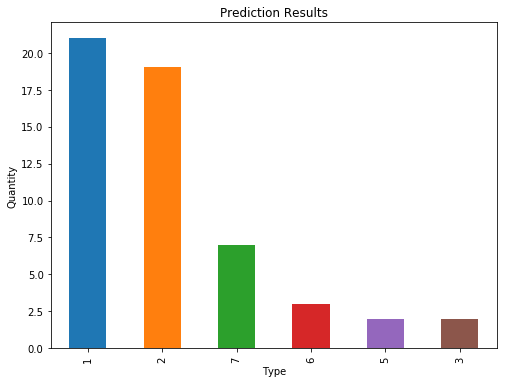

In [898]:
plt.figure(figsize=(8,6))
pre = results.Prediction.sort_values().value_counts().plot(kind = 'bar')
plt.xlabel('Type')
plt.ylabel('Quantity')
plt.title('Prediction Results')

Text(0.5,1,'Test Data')

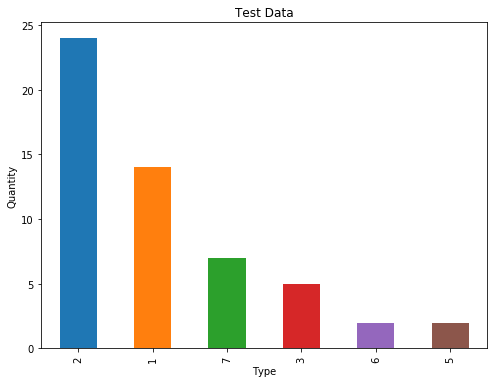

In [899]:
plt.figure(figsize=(8,6))

results.Test_Data.sort_values().value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Quantity')
plt.title('Test Data')

Text(0.5,1,'Results')

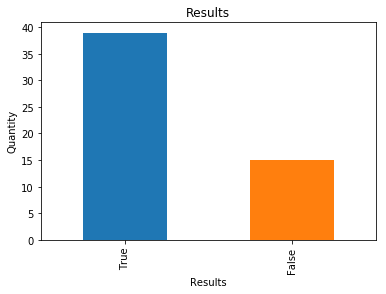

In [900]:
results.Results.value_counts().plot(kind='bar')

plt.xlabel('Results')
plt.ylabel('Quantity')
plt.title('Results')

##  Create standalone model on entire training dataset

In [811]:
from sklearn.externals import joblib
joblib.dump(final_Model, "Final_Model.pkl")

['Final_Model.pkl']